In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# PROBLEM STATEMENT

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [85]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
subm  = pd.read_csv("submission.csv")
combined = pd.concat([train,test],ignore_index=True)

## 
## UNIVARIATE ANALYSIS
## 

In [3]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

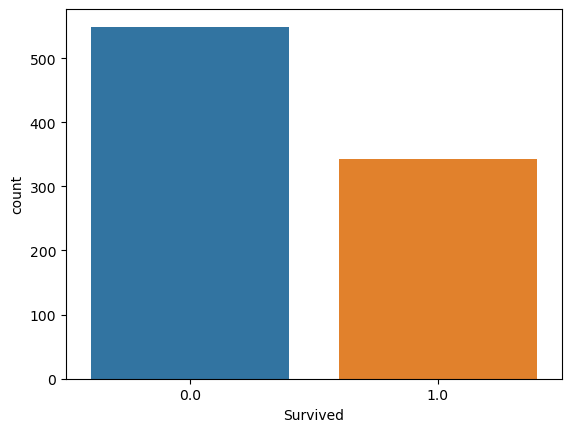

In [4]:
# TARGET VARIABLE 

sns.countplot(combined.Survived)

# Inference : People who died are more than Survived.

In [5]:
# Proportion 

train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [6]:
combined.select_dtypes(include=np.number).columns
ncol=['PassengerId','Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [7]:
combined.select_dtypes(include=object).columns
ccol=['Name', 'Ticket','Sex','Cabin', 'Embarked']

<AxesSubplot:xlabel='Pclass', ylabel='count'>

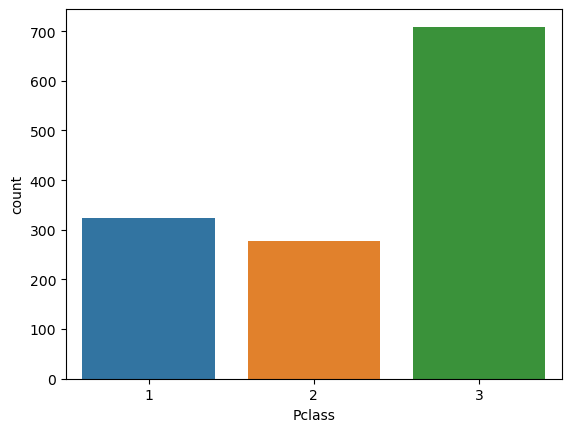

In [8]:
sns.countplot(combined.Pclass)

#Inference : Majority of the passengers belong to class 3.

<AxesSubplot:xlabel='Sex', ylabel='count'>

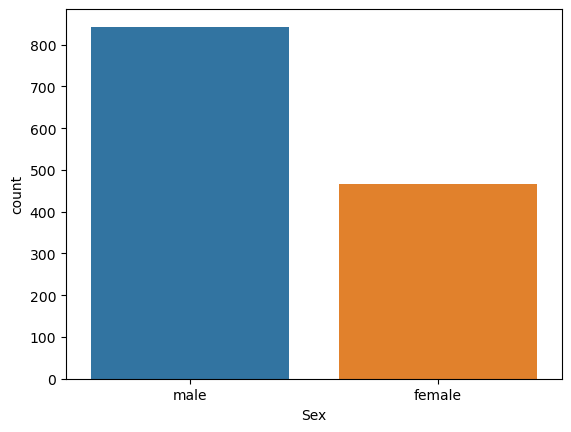

In [9]:
# Sex

sns.countplot(combined.Sex)

# Inference : More number of males died than that of females.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

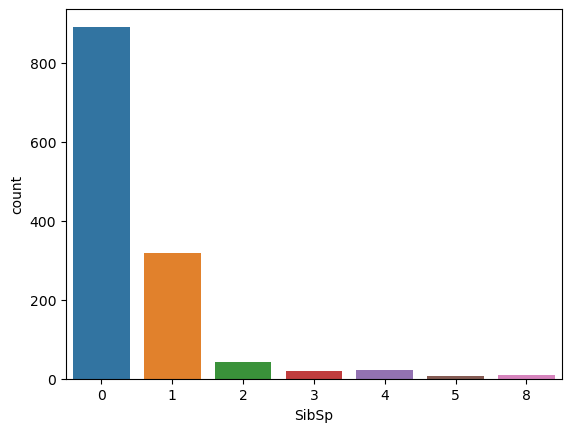

In [10]:
sns.countplot(combined.SibSp)

# Inference : Most of the travellers were solo travellers and max number of people together were 8.
# HYP : Large families may/may not have survived.

<AxesSubplot:xlabel='Parch', ylabel='count'>

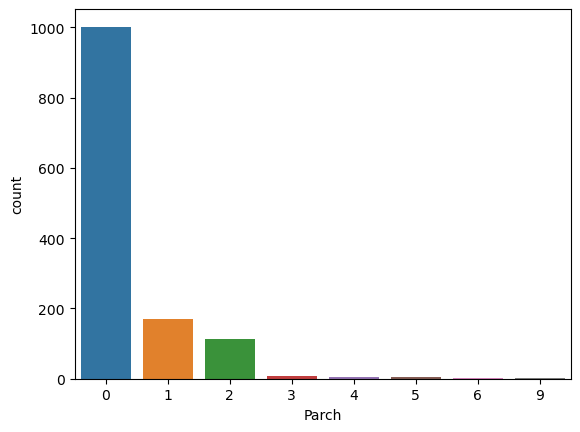

In [11]:
# Parch 

sns.countplot(combined.Parch)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

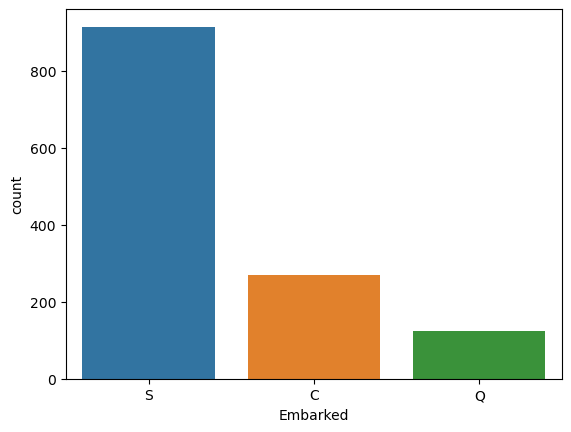

In [12]:
sns.countplot(combined.Embarked)

# Inference : Most of the travellers boarded from Southhampton.

0.40767455974362266

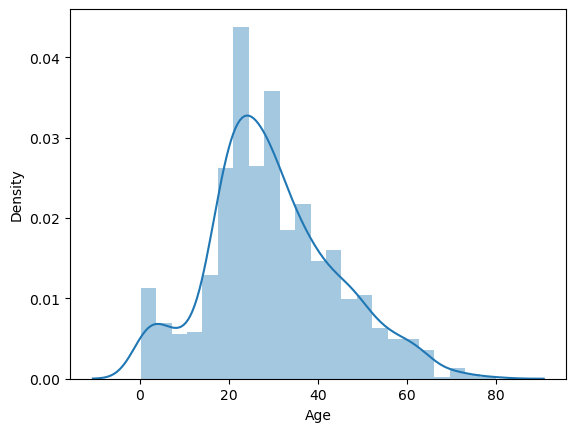

In [13]:
# Age

sns.distplot(combined.Age)
combined.Age.skew()

# Inference : Age of travellers is normally distributed.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

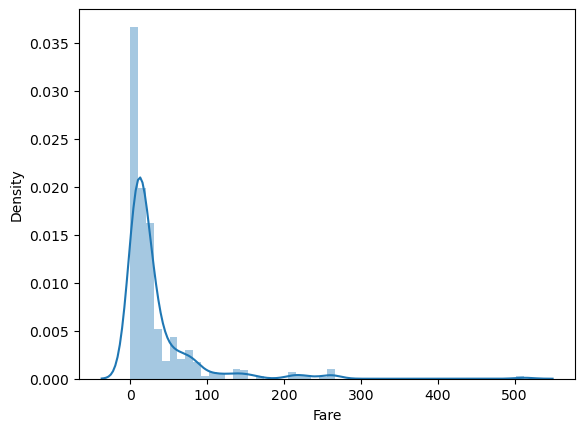

In [14]:
# Fare

sns.distplot(combined.Fare)

# Inference : Fare is highly skewed data

In [15]:
combined.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [16]:
# Unique values in cabin 

len(combined.Cabin.unique())

187

###  
## BIVARIATE ANALYSIS
###  

In [17]:
# Cat(tgt) vs Num

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

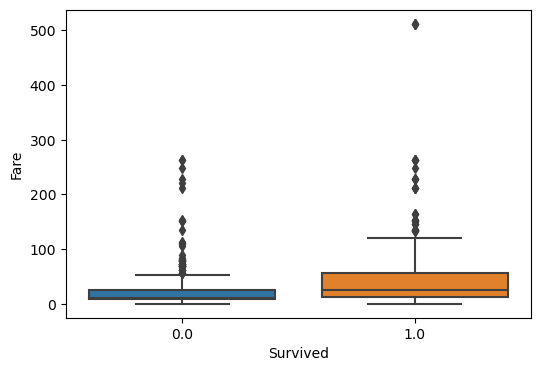

In [18]:
# Survived vs Fare
plt.figure(figsize=(6,4))
sns.boxplot(y='Fare',x='Survived',data=combined)

# Infernece : The people who paid more fair had a higher chance of survival...

<AxesSubplot:xlabel='Survived', ylabel='Age'>

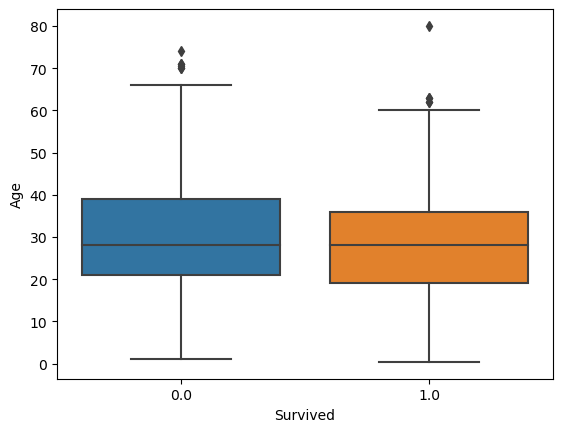

In [19]:
# survived vs age
sns.boxplot(x='Survived',y='Age',data=combined)

# Inference : People of lower age had a higher chance of survival than those of higher age.

In [20]:
# cat(tgt) vs cat

<AxesSubplot:xlabel='Pclass'>

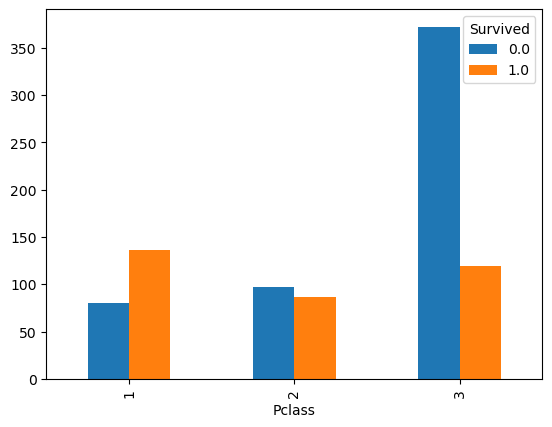

In [21]:
# pclass vs survived
pd.crosstab(combined.Pclass,combined.Survived).plot(kind='bar')

# In class 1 has a higher survival rate.
# In class 2 around half of people has a survivle rate.
# In class theree 60 percent people couldn't survive.

<AxesSubplot:xlabel='Sex'>

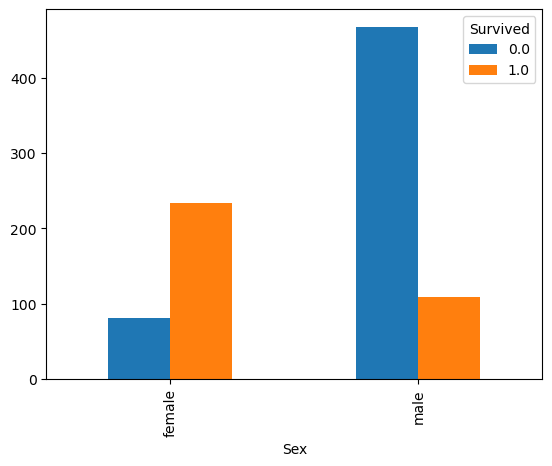

In [22]:
# sex vs survived
pd.crosstab(combined.Sex,combined.Survived).plot(kind='bar')

# Males have no survival rate.

<AxesSubplot:xlabel='SibSp'>

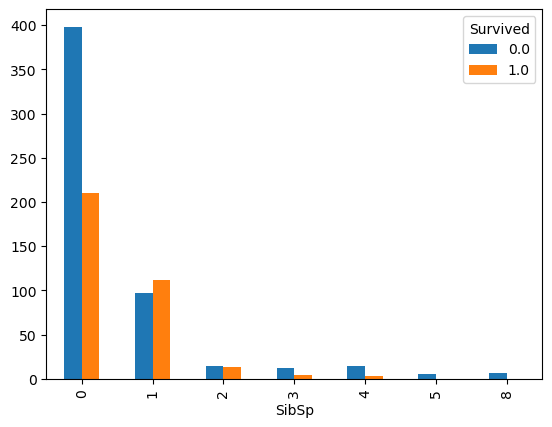

In [23]:
# sibspi vs survived
pd.crosstab(combined.SibSp,combined.Survived).plot(kind='bar')

# Singles and couples had a high chance of survival.

<AxesSubplot:xlabel='Parch'>

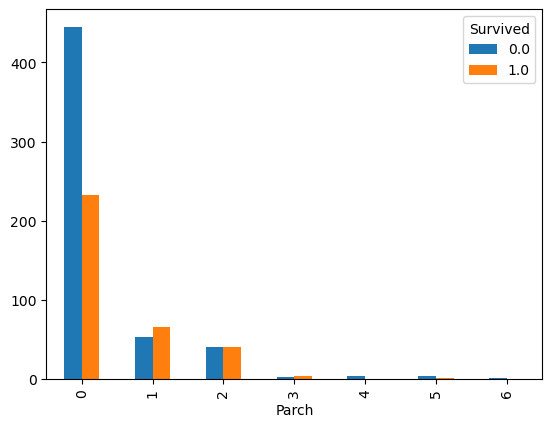

In [24]:
# parch vs survived
pd.crosstab(combined.Parch,combined.Survived).plot(kind='bar')

# Singles and 2 family members at max were able to survive.

<AxesSubplot:xlabel='Embarked'>

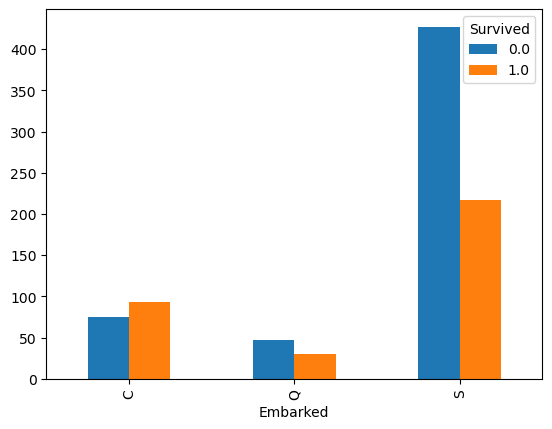

In [25]:
# embarked vs survived
pd.crosstab(combined.Embarked,combined.Survived).plot(kind='bar')

# People boarding from Cherbourg had higher probability of survival in all.

In [26]:
combined.groupby(['Embarked','Pclass'])['Survived'].value_counts(normalize=True)

Embarked  Pclass  Survived
C         1       1.0         0.694118
                  0.0         0.305882
          2       1.0         0.529412
                  0.0         0.470588
          3       0.0         0.621212
                  1.0         0.378788
Q         1       0.0         0.500000
                  1.0         0.500000
          2       1.0         0.666667
                  0.0         0.333333
          3       0.0         0.625000
                  1.0         0.375000
S         1       1.0         0.582677
                  0.0         0.417323
          2       0.0         0.536585
                  1.0         0.463415
          3       0.0         0.810198
                  1.0         0.189802
Name: Survived, dtype: float64

### 
## MISSING VALUES
### 

In [27]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# age basis gender

combined.groupby(['Pclass','Sex'])['Age'].describe()

count       mean        std   min   25%   50%    75%   max
Pclass Sex                                                               
1      female  133.0  37.037594  14.272460  2.00  24.0  36.0  48.00  76.0
       male    151.0  41.029272  14.578529  0.92  30.0  42.0  50.00  80.0
2      female  103.0  27.499223  12.911747  0.92  20.0  28.0  34.00  60.0
       male    158.0  30.815380  13.977400  0.67  23.0  29.5  38.75  70.0
3      female  152.0  22.185329  12.205254  0.17  16.0  22.0  30.00  63.0
       male    349.0  25.962264  11.682415  0.33  20.0  25.0  32.00  74.0

In [29]:
li=[]
for i in combined.Name:
    li.append(i.split(sep=', ')[1].split(sep='. ')[0])
combined['Title']=pd.Series(li)
combined

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [30]:
combined.groupby('Title')['Age'].describe()                         # more precise pattern

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Capt,1.0,70.000000,NaN,70.00,70.00,70.0,70.00,70.0
Col,4.0,54.000000,5.477226,47.00,51.50,54.5,57.00,60.0
Don,1.0,40.000000,NaN,40.00,40.00,40.0,40.00,40.0
Dona,1.0,39.000000,NaN,39.00,39.00,39.0,39.00,39.0
Dr,7.0,43.571429,11.731115,23.00,38.00,49.0,51.50,54.0
Jonkheer,1.0,38.000000,NaN,38.00,38.00,38.0,38.00,38.0
Lady,1.0,48.000000,NaN,48.00,48.00,48.0,48.00,48.0
Major,2.0,48.500000,4.949747,45.00,46.75,48.5,50.25,52.0
Master,53.0,5.482642,4.161554,0.33,2.00,4.0,9.00,14.5


In [31]:
# Mr, Miss, Mrs, Master, Ms     ----> Main titles
# Convert the remaining titles into others.

titles_ignore = ['Don', 'Rev', 'Dr', 'Mme',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona']

In [32]:
def ignore(x):
    if x in titles_ignore:
        return('Others')
    else:
        return (x)

In [33]:
combined['Title']=combined.Title.apply(ignore)

In [34]:
# dealing with missing values in age 

combined['Age']= combined.groupby('Title')['Age'].apply(lambda i: i.fillna(i.median()))

In [35]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [36]:
# Cabin : 90 percent of the data is nan but its not mandatory to drop such column.

combined.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [37]:
cabinlabels=['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6','C23 C25 C27', 
             'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
             'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
             'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
             'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
             'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
             'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
             'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
             'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
             'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
             'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
             'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
             'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
             'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
             'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30',
             'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36',
             'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42',
             'C148', 'B45', 'B36', 'A21', 'D34', 'A9', 'C31', 'B61', 'C53',
             'D43', 'C130', 'C132', 'C55 C57', 'C116', 'F', 'A29', 'C6', 'C28',
             'C51', 'C97', 'D22', 'B10', 'E45', 'E52', 'A11', 'B11', 'C80',
             'C89', 'F E46', 'B26', 'F E57', 'A18', 'E60', 'E39 E41',
             'B52 B54 B56', 'C39', 'B24', 'D40', 'D38', 'C105']

In [38]:
def cabin(x):
    if x in cabinlabels:
        return ('Available')
    else:
        return ('Missing')

In [39]:
combined['Cabinsavailability'] = combined.Cabin.apply(cabin)

In [40]:
combined

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabinsavailability
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Missing
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Available
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Missing
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Available
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,Missing
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Others,Available
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Missing
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.0,0,0,359309,8.0500,NaN,S,Mr,Missing


<AxesSubplot:xlabel='Cabinsavailability'>

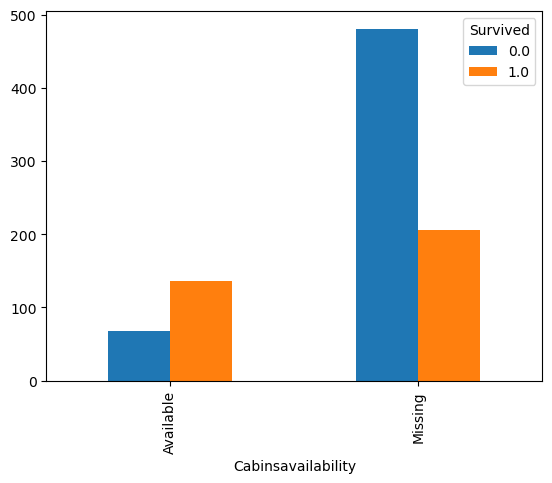

In [41]:
# cabinsavailability vs survived

pd.crosstab(combined.Cabinsavailability,combined.Survived).plot(kind='bar')

# people with cabins had higher chances of survival and survived more.

In [42]:
new=combined.drop(['Name','PassengerId','Cabin','Ticket'],axis=1)

In [43]:
new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabinsavailability
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Missing
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Available
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Missing
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Available
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Missing


### 
## FEATURE ENGINEERING
### 

In [44]:
# family

new['Family']= new.SibSp + new.Parch + 1

<AxesSubplot:xlabel='Family'>

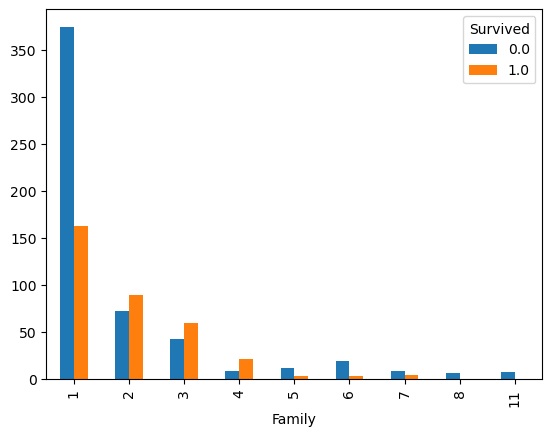

In [45]:
pd.crosstab(new.Family,new.Survived).plot(kind='bar')

# singles and couples had a very higher survival chance tham others.

In [46]:
new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabinsavailability,Family
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Missing,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Available,2
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Missing,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Available,2
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Missing,1


In [47]:
# bin the family

def fam(x):
    if (x>=5):
        return ('Large Family')
    elif (x>=3):
        return ('Small Family')
    elif (x==2):
        return ('Couple')
    else:
        return ('Singles')

In [48]:
new['Family_Cat'] = new.Family.apply(fam)

<AxesSubplot:ylabel='Family_Cat'>

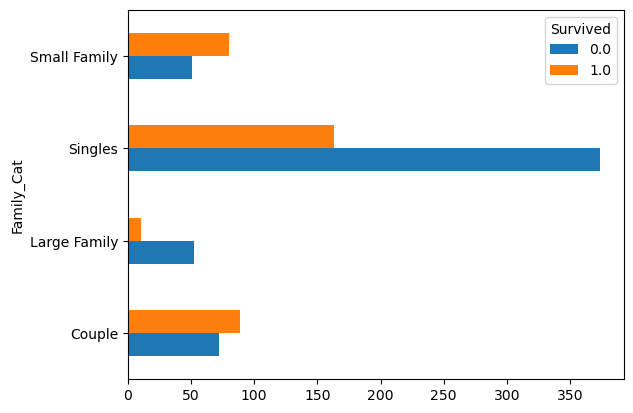

In [49]:
pd.crosstab(new.Family_Cat,new.Survived).plot(kind='barh')

In [50]:
# Fare per person

new['Fare_per_head'] = new.Fare/new.Family

In [51]:
new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabinsavailability,Family,Family_Cat,Fare_per_head
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Missing,2,Couple,3.62500
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Available,2,Couple,35.64165
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Missing,1,Singles,7.92500
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Available,2,Couple,26.55000
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Missing,1,Singles,8.05000


In [52]:
new.loc[new.Fare.isnull(),:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabinsavailability,Family,Family_Cat,Fare_per_head
1043,NaN,3,male,60.5,0,0,NaN,S,Mr,Missing,1,Singles,NaN


In [53]:
# pclass is 3 and sex is male cabin missing  family cat is single

new.loc[new.Fare.isnull(),'Fare']=new.loc[(new.Pclass==3)&(new.Title=='Mr')&(new.Cabinsavailability=='Missing')&(new.Family_Cat=='Singles'),'Fare'].median()

In [54]:
new.isnull().sum()

Survived              418
Pclass                  0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Fare                    0
Embarked                2
Title                   0
Cabinsavailability      0
Family                  0
Family_Cat              0
Fare_per_head           1
dtype: int64

In [55]:
new.loc[new.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabinsavailability,Family,Family_Cat,Fare_per_head
61,1.0,1,female,38.0,0,0,80.0,NaN,Miss,Available,1,Singles,80.0
829,1.0,1,female,62.0,0,0,80.0,NaN,Mrs,Available,1,Singles,80.0


In [56]:
new.loc[new.Embarked.isnull(),'Embarked']=new.loc[(new.Pclass==1)&(new.Sex=='female')&(new.Family==1)&(new.Cabinsavailability=='Available'),'Embarked'].mode()[0]

In [57]:
new.isnull().sum()

Survived              418
Pclass                  0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Fare                    0
Embarked                0
Title                   0
Cabinsavailability      0
Family                  0
Family_Cat              0
Fare_per_head           1
dtype: int64

In [58]:
# count of pclass using gender, embarked, title, cabinavailability

new['magic1']=new.groupby(['Sex','Embarked','Title','Cabinsavailability'])['Pclass'].transform('count')

In [59]:
new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabinsavailability,Family,Family_Cat,Fare_per_head,magic1
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Missing,2,Couple,3.62500,480
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Available,2,Couple,35.64165,32
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Missing,1,Singles,7.92500,123
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Available,2,Couple,26.55000,43
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Missing,1,Singles,8.05000,480


<AxesSubplot:xlabel='Sex', ylabel='magic1'>

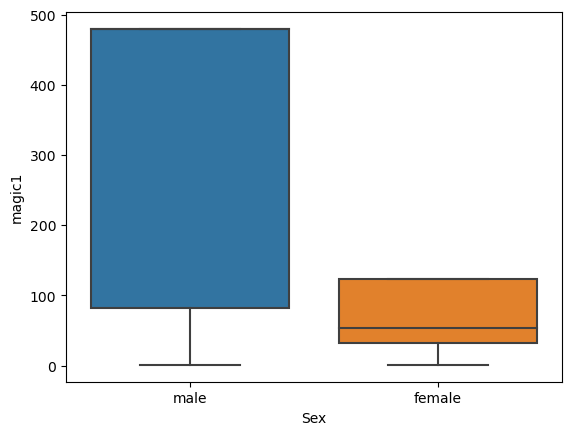

In [60]:
sns.boxplot(x=new.Sex,y=new.magic1)    # pattern is generated

In [61]:
# median fare basis pclass, titles, embarked, family_cat

new['magic2'] = new.groupby(['Pclass','Embarked','Title','Cabinsavailability','Family_Cat'])['Fare'].transform('median')

In [62]:
new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabinsavailability,Family,Family_Cat,Fare_per_head,magic1,magic2
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Missing,2,Couple,3.62500,480,15.0250
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Available,2,Couple,35.64165,32,83.1583
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Missing,1,Singles,7.92500,123,7.9250
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Available,2,Couple,26.55000,43,60.0000
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Missing,1,Singles,8.05000,480,7.8958


### 
## Split the data in train and test
### 

In [63]:
train.shape , test.shape

((891, 12), (418, 11))

In [64]:
newtrain = new.loc[0:train.shape[0]-1,:]

newtest = new.loc[newtrain.shape[0]:,:]

In [65]:
newtest.drop('Survived',axis=1,inplace=True)

In [66]:
newtest.shape    # target variable removed from test dataset for modelling and further proceedure

(418, 14)

#### 
# (   1 3   /   0 1   /   2 0 2 3   )
##### 
# HYPOTHESIS TESTING
##### 
* PCLASS HAS RELATION WITH THE SURVIVED
* SEX ALSO HAS SOME RELATION WITH THE SURVIVED
* CABINS HAS A PATTERN WITH TARGET WHICH WE NEED TO CHECK
* EMBARKED IS AN IMPORTANT VARIABLE FOE THE SURVIVED
* TITLE IS A POWERFUL PREDICTOR FOR  THE TARGET
* FAMILY CAT IS ALSO A POWERFUL VARIABLE

In [67]:
# Ho : p class has no relation with the survived column
# Ha : p class has an important relation with the survived column

# CROSSTAB

import scipy.stats as stats

tbl = pd.crosstab(newtrain.Pclass , newtrain.Survived)

# apply the test

teststats , pvalue , df , exp_freq = stats.chi2_contingency(tbl)
print('P VALUE :',pvalue)

# since the pvalue is less than critical value so reject the null hypothesis
# p class is an important variable for the survived ie target column

P VALUE : 4.549251711298793e-23


In [68]:
# ALL CATEGORY COLUMNS 

cat_cols = ['Pclass','Sex','Embarked','Title','Cabinsavailability','Family_Cat']

for i in cat_cols:
    tbl = pd.crosstab(newtrain.loc[:,i],newtrain.Survived)
    teststats , pvalue , df , exp = stats.chi2_contingency(tbl)
    print('P VALUE FOR',i,'COLUMN IS :',pvalue)


# All  the p values are less than alpha so we reject the null hypothesis and hence they all are important columns for the
# prediction of survived ie target column

P VALUE FOR Pclass COLUMN IS : 4.549251711298793e-23
P VALUE FOR Sex COLUMN IS : 1.1973570627755645e-58
P VALUE FOR Embarked COLUMN IS : 8.294156968447598e-07
P VALUE FOR Title COLUMN IS : 1.9783487591671835e-59
P VALUE FOR Cabinsavailability COLUMN IS : 6.7419704360811776e-21
P VALUE FOR Family_Cat COLUMN IS : 2.747307908074899e-16


In [69]:
# FARE IS DIFFERENT FOR THE PEOPLE WHO DIED VERSUS WHO SURVIVED

# Ho : fare has no relation with survived
# Ha : fare has relation with survived

zero = newtrain.loc[newtrain.Survived==0,'Fare']
one = newtrain.loc[newtrain.Survived==1,'Fare']

In [70]:
# normality and levene's test

stats.shapiro(zero) , stats.shapiro(one)

# failed so it is highly skewed so e will apply non parametric test now

(ShapiroResult(statistic=0.513036847114563, pvalue=3.233740189307736e-36),
 ShapiroResult(statistic=0.5967273712158203, pvalue=1.8337799743381398e-27))

In [71]:
# NON PARAMETRIC TEST

stats.mannwhitneyu(zero,one)   # fare is an important predictor for target

MannwhitneyuResult(statistic=57806.5, pvalue=4.553477179250237e-22)

In [72]:
# AGE VERSUS SURVIVED

# NORMALITY TEST

zero_age = newtrain.loc[newtrain.Survived==0,'Age']
one_age = newtrain.loc[newtrain.Survived==1,'Age']

In [73]:
stats.shapiro(zero_age) , stats.shapiro(one_age)

# not normal 

(ShapiroResult(statistic=0.9440184831619263, pvalue=1.55326245572171e-13),
 ShapiroResult(statistic=0.9793311953544617, pvalue=7.951998122734949e-05))

In [74]:
stats.mannwhitneyu(zero_age,one_age)
# age has no relation with the survived (p value is greater than alpha so we failed to reject the null hypothesis)

MannwhitneyuResult(statistic=99183.5, pvalue=0.15476166755486367)

In [75]:
# analysis complete on the basis of statistics

### 
## SCALING
### 

In [76]:
# convert the target into integer

newtrain['Survived'] = newtrain.Survived.astype('int')

In [77]:
newtrain.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabinsavailability,Family,Family_Cat,Fare_per_head,magic1,magic2
0,0,3,male,22.0,1,0,7.25,S,Mr,Missing,2,Couple,3.625,480,15.025


In [78]:
# Scale age , fare , fareperhead

cols =['Age','Fare','Fare_per_head']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for i in cols:
    newtrain.loc[:,cols] = sc.fit_transform(newtrain.loc[:,cols])
    newtest.loc[:,cols] = sc.transform(newtest.loc[:,cols])

In [90]:
dummytrain = pd.get_dummies(newtrain,drop_first=True)
dummytest = pd.get_dummies(newtest,drop_first=True)

In [91]:
X = dummytrain.drop('Survived',axis=1)
y = dummytrain.Survived
test = dummytest

In [93]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,\
roc_curve,log_loss
from sklearn.model_selection import cross_val_score,StratifiedKFold

# CROSS VALIDATING THE MODELS USING STRATIFIED KFOLD CROSS VALIDATION AND EVALUATING

# CREATING MACHINE INSTANCE

lr  = LogisticRegression()
rg  = RidgeClassifier()
dt  = DecisionTreeClassifier()
rf  = RandomForestClassifier()
xg  = XGBClassifier()
ca  = CatBoostClassifier(verbose=0)
ad  = AdaBoostClassifier()
gb  = GradientBoostingClassifier()
lg  = LGBMClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
gn  = GaussianNB()
st  = StackingClassifier([('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier())],final_estimator=lr,stack_method='predict')

cv = StratifiedKFold(n_splits=5,shuffle=True)

for m in [lr,rg,dt,rf,xg,ca,knn,st]:
    print('\t\t',m,'\n')
    for i,j in cv.split(X,y):
        xtr,xte,ytr,yte = X.loc[i],X.loc[j],y[i],y[j]
        model = m.fit(xtr,ytr)
        pred_tr,pred_te = model.predict(xtr),model.predict(xte)
        print(round(f1_score(ytr,pred_tr),4),' , ',round(f1_score(yte,pred_te),4))
    print('\n')

		 LogisticRegression() 

0.7731  ,  0.7313
0.7807  ,  0.7344
0.7724  ,  0.7353
0.7667  ,  0.8189
0.7635  ,  0.7801


		 RidgeClassifier() 

0.7739  ,  0.7727
0.7932  ,  0.6984
0.779  ,  0.7812
0.7748  ,  0.797
0.7707  ,  0.797


		 DecisionTreeClassifier() 

0.9738  ,  0.7132
0.9852  ,  0.7402
0.9815  ,  0.7368
0.9778  ,  0.702
0.9834  ,  0.7273


		 RandomForestClassifier() 

0.9852  ,  0.6935
0.9816  ,  0.8056
0.9835  ,  0.7121
0.9743  ,  0.7353
0.974  ,  0.7857


		 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_de

In [103]:
# BEST PERFORMANCE IS COMING ON RIDGE CLASSIFIER SO WE WILL TUNE IT AND FIT AS OUR FINAL MODEL.

from sklearn.model_selection import GridSearchCV as g
gscv = g(RidgeClassifier(),param_grid={'alpha':[i*0.01 for i in range(1,101)]},scoring='accuracy',cv=cv,verbose=0)
gscv.fit(X,y).best_params_

{'alpha': 0.8200000000000001}

In [108]:
# FITTING FINAL MODEL AS RIDG CLASSIFIER WITH LAMBDA AS 0.82

model = RidgeClassifier(alpha=0.82).fit(X,y)

In [143]:
subm.Survived = model.predict(test)
subm.to_csv("titanic disaster.csv",index=False)

In [144]:
cd

C:\Users\prabh


In [145]:
# FINAL SCORE ON KAGGLE : 0.7751